In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(['Unnamed: 32','id'], axis=1)

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y = df.diagnosis
x = df.iloc[:,1:31]

In [9]:
print(y)
y.describe()

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [10]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
print(x_train.shape)
print(y_train.shape)


(455, 30)
(455,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [14]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [15]:
print(np.mean(x_train_std))
print(np.std(x_train_std))

2.0431357053907643e-17
1.0


In [16]:
#Finding the covariance matrix which is M^T*M
cov_matrix = np.matmul(x_train_std.T, x_train_std)
print('The dimension of the covariance matrix is: ', cov_matrix.shape)

The dimension of the covariance matrix is:  (30, 30)


In [17]:
from scipy.linalg import eigh
ev = eigh(cov_matrix, eigvals_only=True)
print(ev)

#eigh will return eigen values in ascending order
e_values_1, e_vectors_1 = eigh(cov_matrix, eigvals = (28,29))

#generates only the largest and the second largest eigen values which are (28,29) for visualization
print('The shape of the eigen vectors is: ', e_vectors_1.shape)
e_vectors_1 = e_vectors_1.T

#converting into 2D shape for ease
print('Changed shape of eigen vectors is: ', e_vectors_1.shape)

[5.07658288e-02 3.45628144e-01 6.31318056e-01 2.95047757e+00
 3.56946759e+00 7.46170929e+00 7.93182141e+00 9.88643850e+00
 1.19909099e+01 1.35764022e+01 1.44886240e+01 2.05315914e+01
 2.32893984e+01 2.72518819e+01 3.61151946e+01 4.25228128e+01
 7.57997663e+01 1.05301440e+02 1.22464429e+02 1.38160146e+02
 1.58352498e+02 1.90658101e+02 2.06482551e+02 2.93373168e+02
 5.55776045e+02 7.70194650e+02 9.11500669e+02 1.27651670e+03
 2.69452564e+03 5.92829976e+03]
The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is:  (2, 30)


In [18]:
new_coordinates_1 = np.matmul(e_vectors_1, x_train_std.T)
print('The shape of the resultant new data points is: ', e_vectors_1.shape,'X',x_train_std.T.shape, '=', new_coordinates_1.shape)

The shape of the resultant new data points is:  (2, 30) X (30, 455) = (2, 455)


In [19]:
#appending labels to the 2D projected data
new_coordinates_1 = np.vstack((new_coordinates_1, y_train)).T

#creating a new dataframe for plotting the labelled points
plot_df = pd.DataFrame(data=new_coordinates_1, columns=('1st Principal', '2nd Principal', 'Labels'))
print(plot_df.head())

  1st Principal 2nd Principal Labels
0       1.10667      3.039161      B
1      0.400452      2.282314      B
2     -1.995444      1.084095      B
3      0.179338        2.5611      B
4     -1.017616      2.848305      B


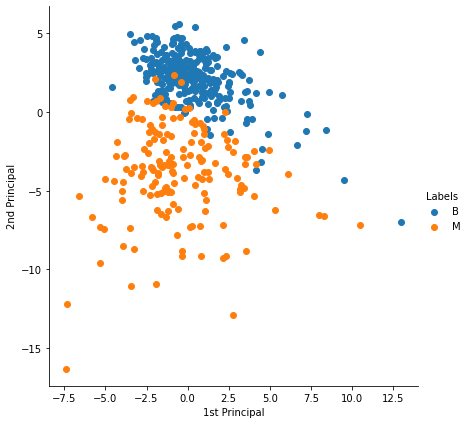

In [20]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df, hue='Labels', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

In [21]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9473684210526315


In [23]:
precision = precision_score(y_test, y_pred,pos_label='B')
print('Precision:', precision)

Precision: 0.9692307692307692


In [24]:
recall = recall_score(y_test, y_pred,pos_label='B')
print('Recall:', recall)

Recall: 0.9402985074626866


In [25]:
f1 = f1_score(y_test, y_pred,pos_label='B')
print('F1 score:', f1)

F1 score: 0.9545454545454547
